In [2]:
# Import Libraries 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('traffic_violaions.csv')
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.shape

(52966, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [6]:
df.describe()

,country_name,driver_age_raw,driver_age
count,0.0,49588.000000,49346.000000
mean,NaN,1965.712229,34.171483
std,NaN,132.195712,12.769907
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1977.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


In [7]:
df.isnull().sum()

stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

<Axes: >

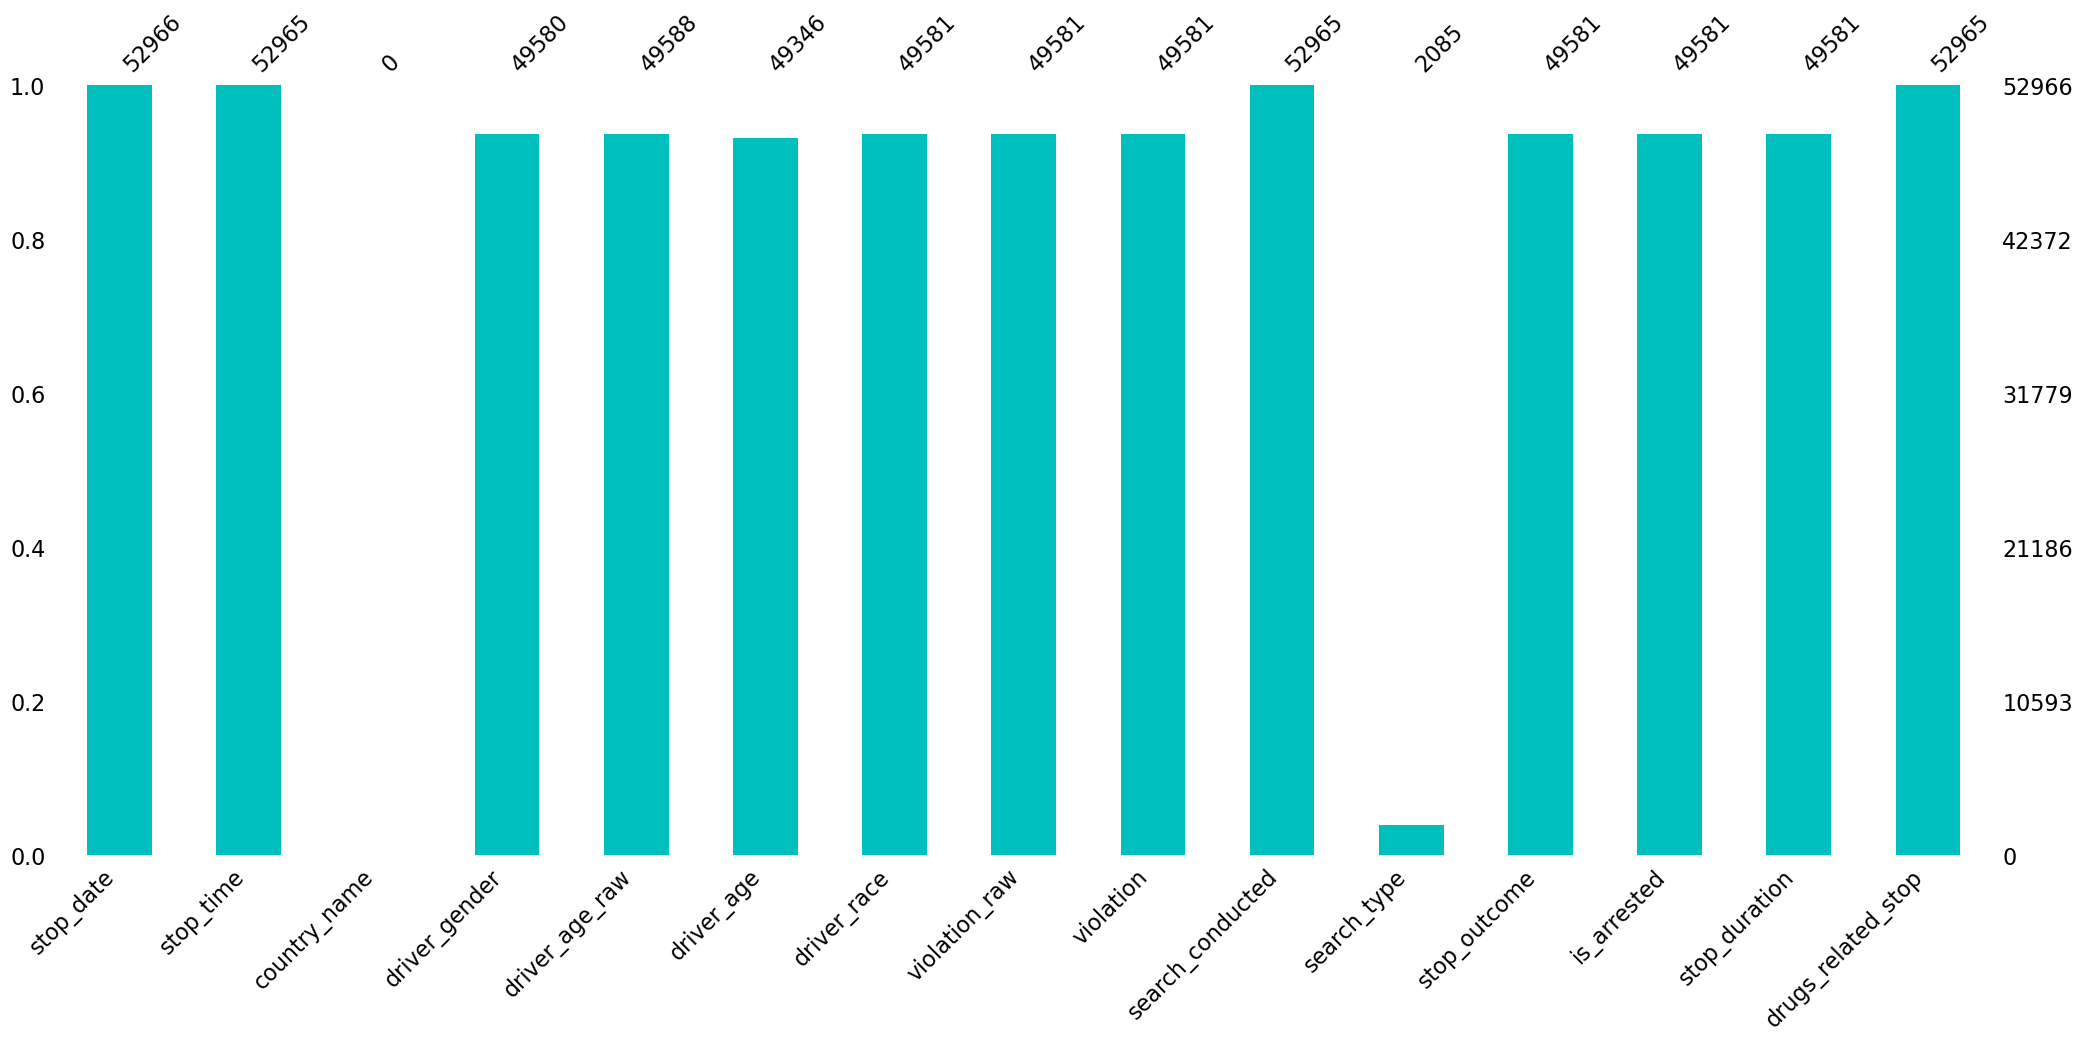

In [8]:
msno.bar(df,color= 'c')


**1. As in above graph, 'Country_name' and 'Search_type' columns contains almost all Nan values. We can drop these two columns.**

**2. As there is no need of 'driver_age_raw' because we have another one column named 'driver_age'. So we can drop that column.**

In [9]:
df.drop(['country_name','search_type','driver_age_raw','violation_raw'],axis=1 , inplace = True)

In [10]:
df.isnull().sum()

stop_date                0
stop_time                1
driver_gender         3386
driver_age            3620
driver_race           3385
violation             3385
search_conducted         1
stop_outcome          3385
is_arrested           3385
stop_duration         3385
drugs_related_stop       1
dtype: int64

In [11]:
# Dropping nan values 
df.dropna(subset='driver_gender',inplace = True)

In [12]:
df.isnull().sum()

stop_date               0
stop_time               0
driver_gender           0
driver_age            240
driver_race             0
violation               0
search_conducted        0
stop_outcome            0
is_arrested             0
stop_duration           0
drugs_related_stop      0
dtype: int64

**We can see that there are some missing values in 'driver_age' column. We have to fill that values.**

In [13]:
df['driver_age']= df['driver_age'].fillna(df.groupby('driver_gender')['driver_age'].transform('median'))

**Above we grouped df by 'driver_gender' column and selected 'driver_age' column within each group.
And calculated the median age within each group of 'driver_gender' and transforms the values accordingly.
So, for each missing value in the 'driver_age' column, it fills it with the median age of drivers of the same gender.**

In [14]:
df.isnull().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age            0
driver_race           0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

In [15]:
df.shape

(49580, 11)

In [16]:
df.duplicated().any()

True

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.duplicated().any()

False

In [19]:
df.shape

(49410, 11)

In [20]:
df['driver_race'].unique()

array(['White', 'Black', 'Asian', 'Hispanic', 'Other'], dtype=object)

In [21]:
df['violation'].unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation',
       'Registration/plates'], dtype=object)

In [22]:
df['year'] = df['stop_date'].str.split('/').str[-1]

df.search_conducted = df.search_conducted.replace(to_replace=[True, False], value=[1, 0])

df.drugs_related_stop = df.drugs_related_stop.replace(to_replace=[True, False], value=[1, 0])

df.is_arrested = df.is_arrested.replace(to_replace=[True, False], value=[1, 0])

In [23]:
df['stop_duration']= df['stop_duration'].map({'0-15 Min': 7.5, '16-30 Min':23, '30+ Min': 45})

In [24]:
df['stop_duration'].value_counts()

stop_duration
7.5     37325
23.0     9804
45.0     2281
Name: count, dtype: int64

In [25]:
df.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
0,1/2/2005,1:55,M,20.0,White,Speeding,0,Citation,0,7.5,0,2005
1,1/18/2005,8:15,M,40.0,White,Speeding,0,Citation,0,7.5,0,2005
2,1/23/2005,23:15,M,33.0,White,Speeding,0,Citation,0,7.5,0,2005
3,2/20/2005,17:15,M,19.0,White,Other,0,Arrest Driver,1,23.0,0,2005
4,3/14/2005,10:00,F,21.0,White,Speeding,0,Citation,0,7.5,0,2005


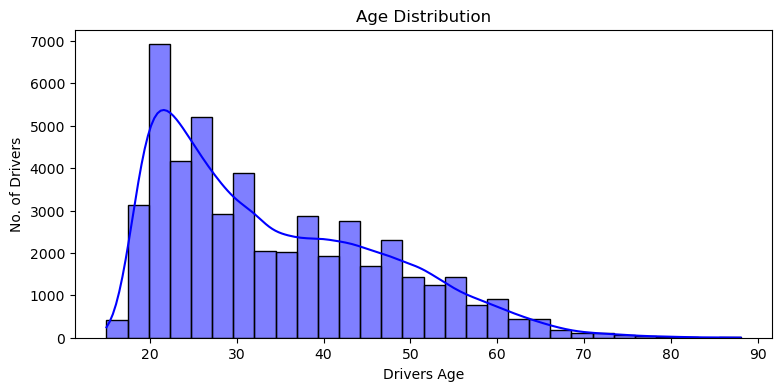

In [26]:
plt.figure(figsize = (9,4))
sns.histplot(df['driver_age'],kde =True, color='blue',bins =30)
plt.title('Age Distribution')
plt.xlabel('Drivers Age')
plt.ylabel('No. of Drivers')
plt.show()

**Here we can see that people between age 18 - 40 doing more violation.**

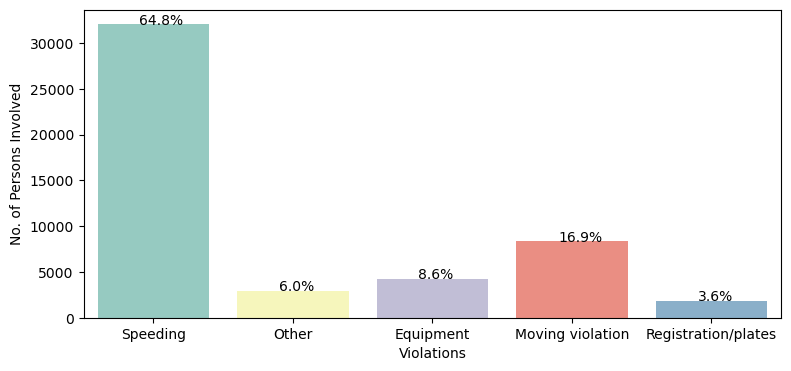

In [27]:
plt.figure(figsize = (9,4))
ax= sns.countplot(x= 'violation',data= df, palette = 'Set3')
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(df.violation))
    x = i.get_x()+i.get_width()-0.5
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.xlabel('Violations')
plt.ylabel('No. of Persons Involved')
plt.show()

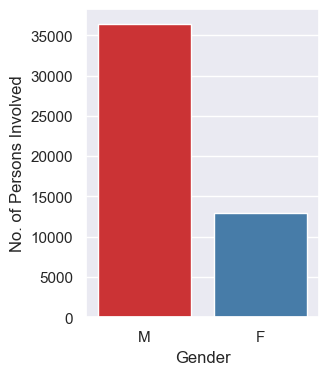

In [28]:
sns.set(rc={'figure.figsize':(3,4)})
sns.countplot(x=df['driver_gender'],data=df,palette = 'Set1')
plt.xlabel('Gender')
plt.ylabel('No. of Persons Involved')
plt.show()

**Above we can conclude that Male are doing more violation as compare to Female.**

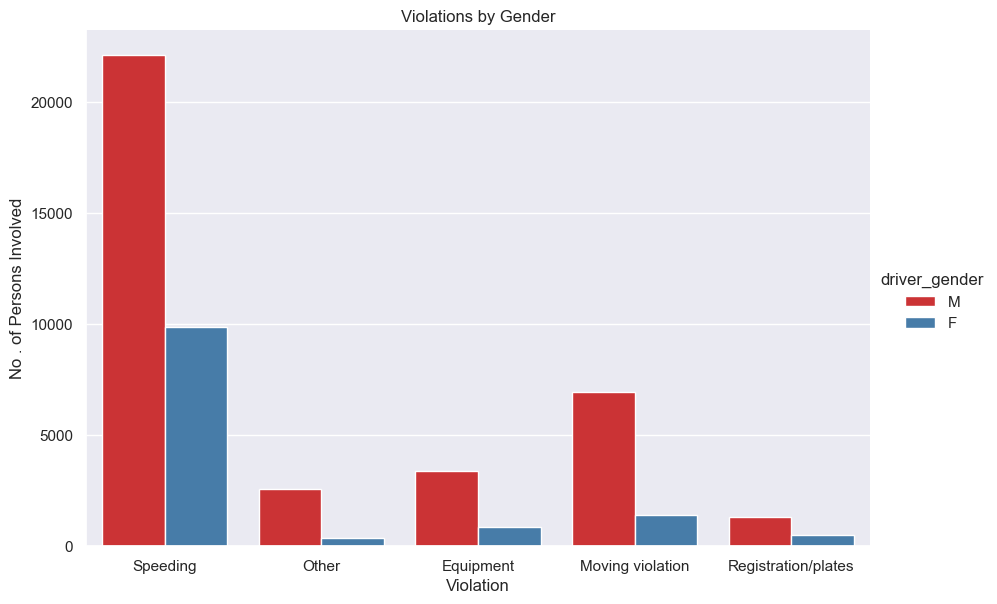

In [29]:
sns.catplot(data=df, kind="count", x="violation", hue="driver_gender", height=6, aspect=1.5, palette = 'Set1')
plt.title('Violations by Gender')
plt.xlabel('Violation')
plt.ylabel('No . of Persons Involved')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

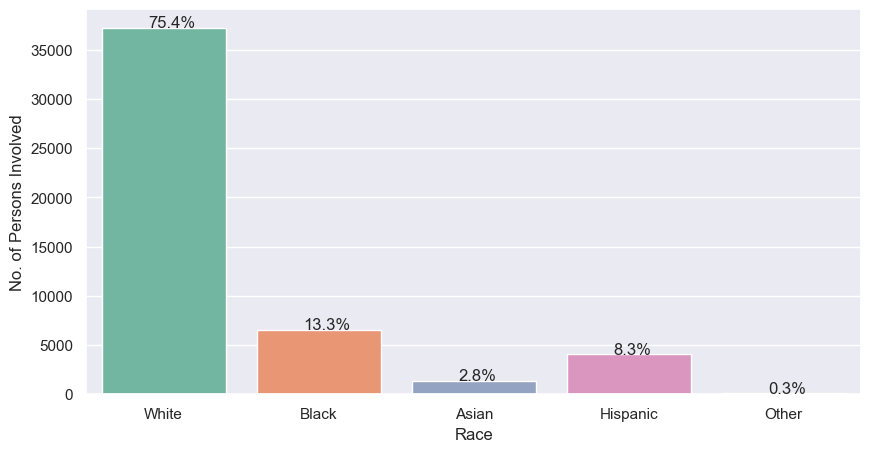

In [30]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x= 'driver_race',data= df, palette = 'Set2')
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(df.driver_race))
    x = i.get_x()+i.get_width()-0.5
    y = i.get_height()
    ax.annotate(percentage, (x, y)) 
plt.xlabel('Race')
plt.ylabel('No. of Persons Involved')
plt.show()

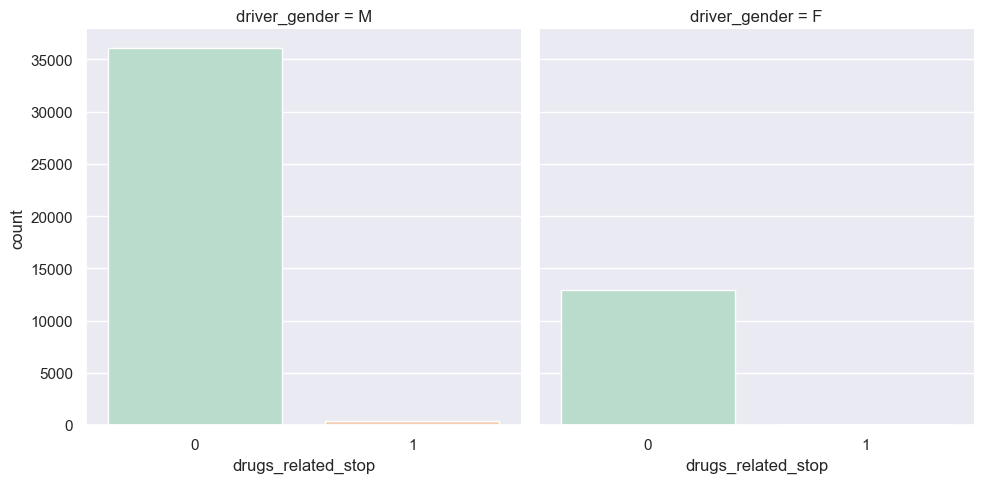

In [31]:
sns.catplot(x='drugs_related_stop',col='driver_gender',kind='count',data=df,palette = 'Pastel2')
plt.show()

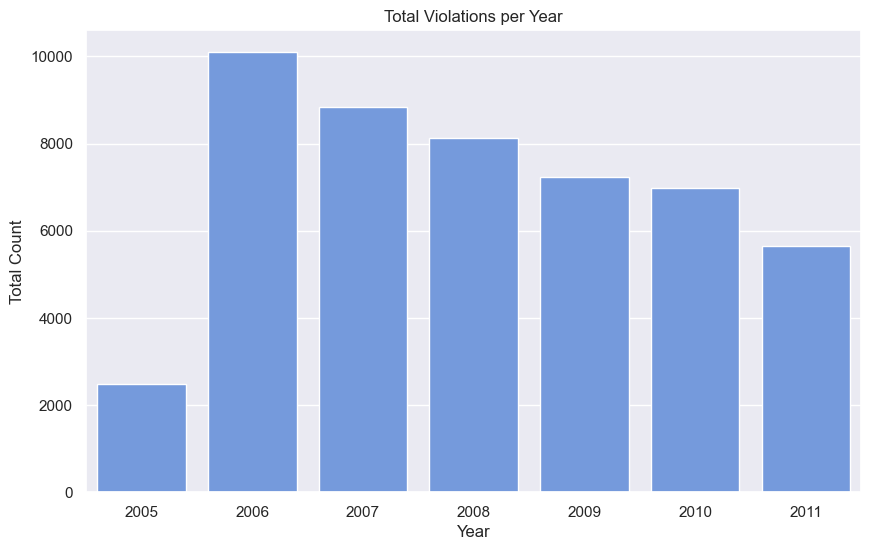

In [32]:
violation_counts = df.groupby('year').size().reset_index(name='total_count')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=violation_counts, x="year", y="total_count", color='cornflowerblue')
plt.title('Total Violations per Year')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

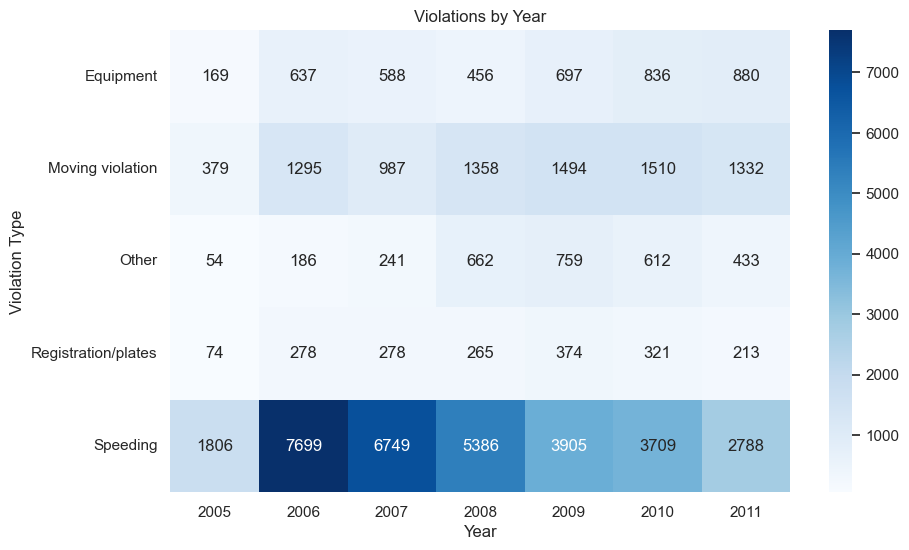

In [33]:


# Group by year and violation and count occurrences
violation_count = df.groupby(['violation','year']).size().reset_index(name='count')

# Pivot the DataFrame to get counts of violations by year
heatmap_data0 = violation_count.pivot(index='violation', columns='year', values='count')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data0, annot=True, fmt=".0f", cmap="Blues")
plt.title('Violations by Year')
plt.xlabel('Year')
plt.ylabel('Violation Type')
plt.show()



In [34]:
search_conducted = len(df[df.search_conducted == True])
arrested_after_search = len(df[(df.search_conducted == True) & (df.is_arrested == True)])
arrested = ((arrested_after_search/search_conducted)*100)
not_arrested = (100-(arrested))

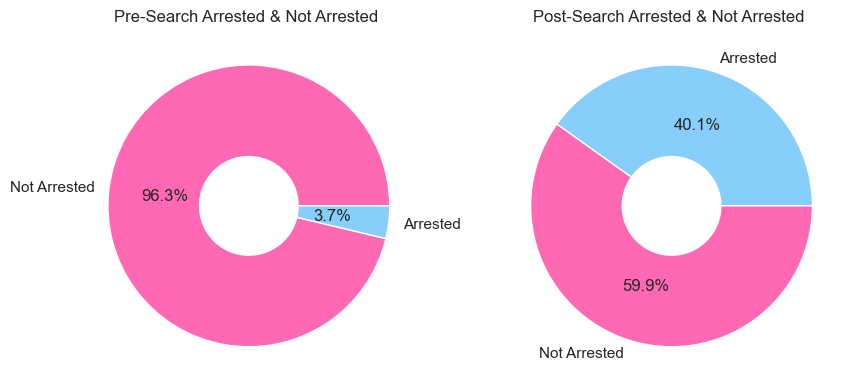

In [35]:
fig, ax = plt.subplots(1,2,figsize =(10,5))
ax[0].pie(x=df['is_arrested'].value_counts(), labels = ('Not Arrested','Arrested'),
       autopct = '%1.1f%%', colors = ["hotpink","lightskyblue"])
ax[0].add_artist(plt.Circle((0,0), 0.35, fc = 'white'))
ax[0].set_title('Pre-Search Arrested & Not Arrested ')
ax[0].set_aspect('equal');



ax[1].pie([arrested,not_arrested], labels = ('Arrested','Not Arrested'),
       autopct = '%1.1f%%', colors = ["lightskyblue","hotpink"])
ax[1].add_artist(plt.Circle((0,0), 0.35, fc = 'white'))
ax[1].set_title('Post-Search Arrested & Not Arrested ')
ax[1].set_aspect('equal');


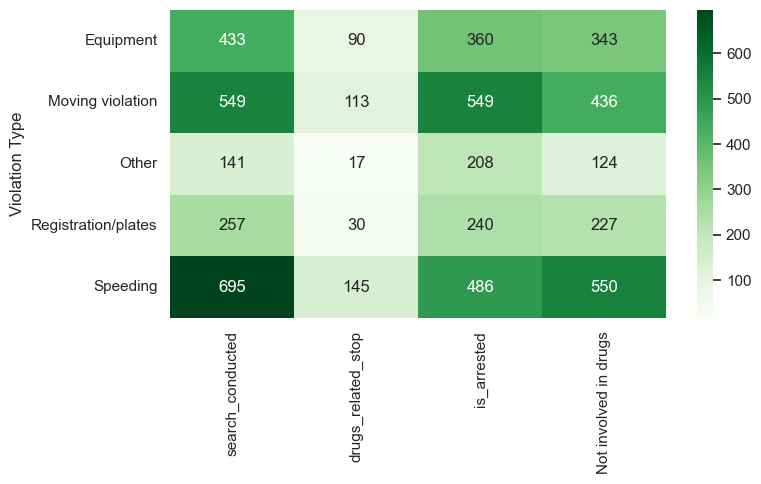

In [36]:
result = df.groupby('violation')[['search_conducted','drugs_related_stop','is_arrested']].sum()
result['Not involved in drugs'] = result['search_conducted']-result['drugs_related_stop']
plt.figure(figsize = (8,4))
sns.heatmap(result, annot = True, fmt = ".0f", cmap = "Greens");
plt.ylabel("Violation Type");